
# Name: SHIVANGI TRIPATHI


# CHART 1:- Influenza National Summary (green and yellow chart)
## This chart by Clinical Lab represents the number of positive specimens by type - Influenza A Influenza B for season 2018-2019
## Type of Influenza is shown as a stacked bar graph, while % positive flu is shown as a line graph
## Looking at the graph, we observe that Number of positive specimens for Type A is highest in week 5 2019

Warning message:
"package 'reshape2' was built under R version 3.5.2"Warning message:
"package 'ggplot2' was built under R version 3.5.2"

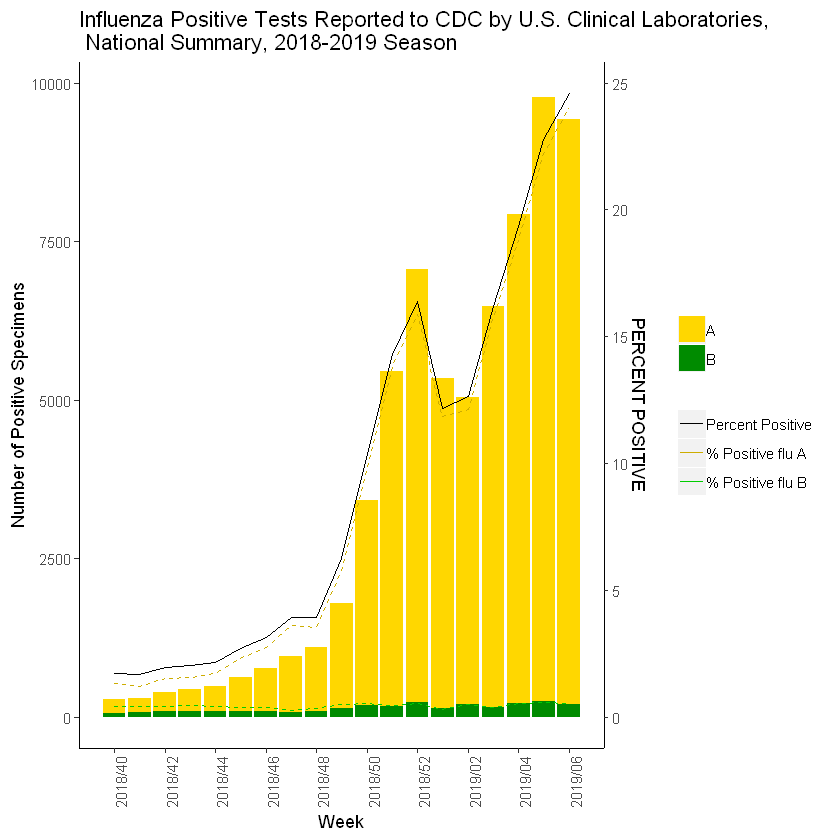

In [1]:
library("reshape2")
library("ggplot2")
#setwd("C:/UB_Spring_Semester/Data_Intensive_Computing/Lab_1/part2/part2/final/")
influ <- read.csv("./WHO_NREVSS_Clinical_Labs_1st.csv")

POSITIVE <- (influ$PERCENT.POSITIVE/100)*influ$TOTAL.SPECIMENS
YEAR_WEEK <- paste(influ$YEAR,influ$WEEK, sep="-")
YEAR.WEEK<-as.Date(paste(YEAR_WEEK,1), format="%Y-%U%u")

influ_df <- data.frame(influ,POSITIVE,YEAR.WEEK)

# melt function helps to stack the columns needed to be shown in the form of stacked bar
influ_df_melt <- melt(influ_df, id.vars=c("REGION.TYPE","REGION","YEAR","WEEK","TOTAL.SPECIMENS","PERCENT.A",
                                        "PERCENT.B","PERCENT.POSITIVE","POSITIVE", "YEAR.WEEK"),
                      variable.name = "TOTAL.VARIABLE", value.name = "TOTAL.VALUE")

# Following function helps in formatting the date shown in X axis.
# it has been referred from the site:- 
#https://stackoverflow.com/questions/33348329/date-breaks-scales-shifts-date-scale-in-ggplot
date_label <- function (format = "%Y-%U") { function(x) format(x, format)}

#ggplot helps to create a basic structure for plotting graphs.
# For specific graphs we used geom_bar or geom_line for different types of bar graphs and line graphs respectively.
#scale_x_date is used to label X axis ticks containing weeks and year.
ggplot(data=influ_df_melt) + 
geom_bar(aes(x=YEAR.WEEK, y=TOTAL.VALUE, fill= TOTAL.VARIABLE), stat="identity") +
theme(axis.text.x= element_text(angle=90), legend.title=element_blank()) +
ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, \n National Summary, 2018-2019 Season") +
ylab("Number of Positive Specimens") + 
xlab("Week") +
scale_fill_manual(values=c("gold1","green4"), breaks=c("TOTAL.A","TOTAL.B"), 
                  labels=c("A","B")) +
geom_line(aes(x= YEAR.WEEK,y=PERCENT.POSITIVE*400, group=1, colour="black"), stat="identity", linetype= "solid") +
geom_line(aes(x= YEAR.WEEK,y=PERCENT.A*400, group=1, colour="gold3"), stat="identity", linetype= "dashed") +
geom_line(aes(x= YEAR.WEEK,y=PERCENT.B*400, group=1, colour="green3"), stat="identity", linetype= "dashed") +
scale_y_continuous(sec.axis= sec_axis(~./400, name="PERCENT POSITIVE")) +
scale_linetype_manual(values=c("solid", "dashed","dashed")) +
scale_color_manual(values=c("black","gold3","green3"),
                     labels=c("Percent Positive","% Positive flu A","% Positive flu B")) +
scale_x_date(breaks = "2 weeks",labels=date_label("%Y/%U"))+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black"))

# CHART 2:- Positive Tested
## This chart by Public Health represents the number of positive specimens by type/ sub-types - Influenza A Influenza B for season 2018-2019
## All types/ sub-types of Influenza is shown as a stacked bar graph
## Looking at the graph, we observe that Number of positive specimens shoots up between week 51 2018 to week 5 2019, it is highest for week 3 2019

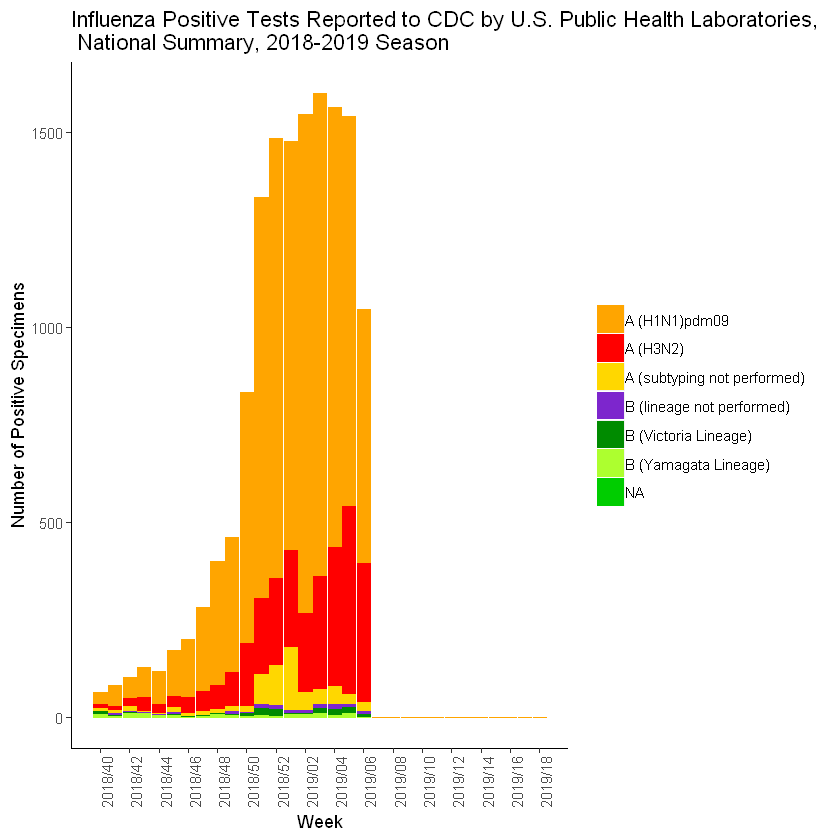

In [2]:
library(reshape2)
library(ggplot2)
#setwd("C:/UB_Spring_Semester/Data_Intensive_Computing/Lab_1/part2/part2/final/")
flu<-read.csv("./WHO_NREVSS_Public_Health_Labs_2nd.csv")
flu_df<-data.frame(flu)

Year_week1 <- paste(flu_df$YEAR,flu_df$WEEK,sep="-")
Year_week<-as.Date(paste(Year_week1,1), format="%Y-%U%u")
influ_df <- data.frame(flu_df,Year_week)
# Following function helps in formatting the date shown in X axis.
# it has been referred from the site:- 
#https://stackoverflow.com/questions/33348329/date-breaks-scales-shifts-date-scale-in-ggplot
date_label <- function (format = "%Y-%U") {function(x) format(x, format)}
influ_melt <- melt(influ_df, id.vars=c("REGION.TYPE","REGION","YEAR","WEEK","TOTAL.SPECIMENS", "Year_week"), 
                   variable.name = "flu_type_variable", value.name="flu_type_value")
ggplot(data= influ_melt,aes(x=Year_week, y=flu_type_value)) + 
geom_bar(aes(fill=flu_type_variable,color=flu_type_variable), stat="identity") +
theme(axis.text.x= element_text(angle=90)) +
ggtitle("Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, \n National Summary, 2018-2019 Season")+
scale_x_date(breaks = "2 weeks",labels=date_label("%Y/%U"))+
ylab("Number of Positive Specimens") + 
xlab("Week") +
theme(legend.title=element_blank())+
scale_fill_manual(values=c("orange","red","gold","purple3","green4","greenyellow","green3"),
                     labels=c("A (H1N1)pdm09","A (H3N2)","A (subtyping not performed)",
                              "B (lineage not performed)","B (Victoria Lineage)","B (Yamagata Lineage)"))+
scale_color_manual(values=c("orange","red","gold","purple3","green4","greenyellow","green3"),
                     labels=c("A (H1N1)pdm09","A (H3N2)","A (subtyping not performed)",
                              "B (lineage not performed)","B (Victoria Lineage)","B (Yamagata Lineage)"))+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black"))

# CHART 3:- Pediatric Deaths
## This chart represents the Influenza associated Pediatric Deaths from season 2015-2016 to present
## We observe that highest number of deaths were reported in season 2017-2018

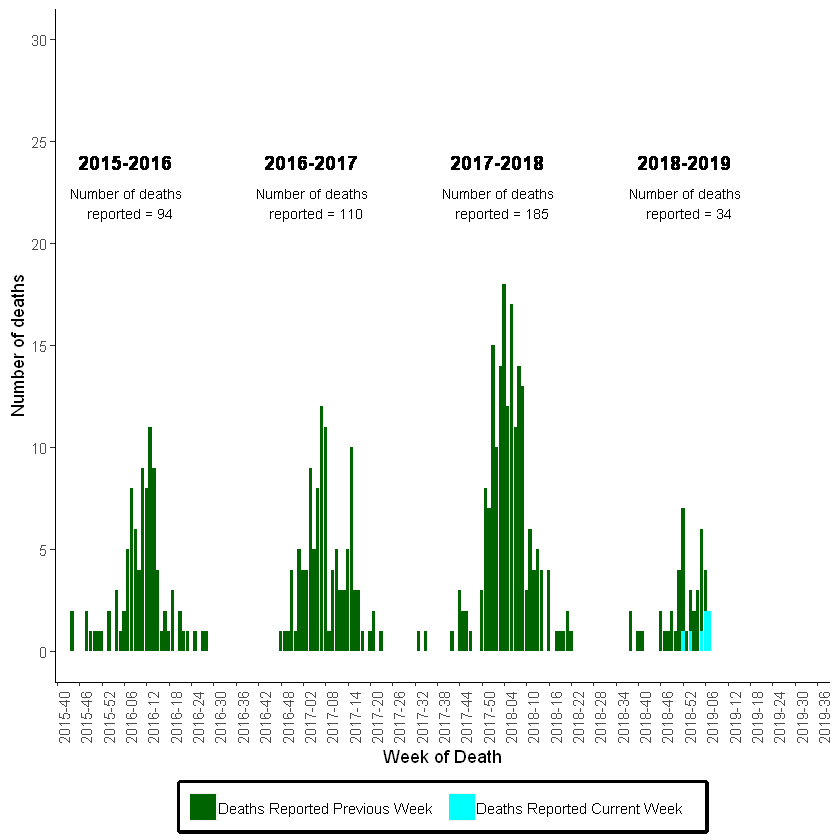

In [3]:

# Influenza pediatric deaths
#setwd("C:/UB_Spring_Semester/Data_Intensive_Computing/Lab_1/part2/part2/final/")
#install.packages("reshape2")
library("reshape2")

influ_ped <- read.csv("./Weekly_3rd.csv")

influ_ped <- data.frame(influ_ped)


influ_melt <- melt(influ_ped, id.vars=c("SEASON","WEEK.NUMBER","NO..OF.DEATHS"), 
                   variable.name = "reported.deaths.variable", value.name="reported.deaths.value")


ggplot(data= influ_melt) + geom_bar(aes(x=WEEK.NUMBER, y=reported.deaths.value, fill= reported.deaths.variable), 
                                    stat="identity") +
scale_fill_manual(values=c("darkgreen","cyan"), 
                  label= c("Deaths Reported Previous Week","Deaths Reported Current Week")) +
scale_y_continuous(breaks=seq(0,30, by=5), limits=c(0,30)) +
theme(axis.text.x= element_text(angle=90), legend.position="bottom", legend.title= element_blank(),
      legend.box.background = element_rect(colour="black", linetype="solid", size=2)) +
scale_x_discrete(breaks=c("2015-40","2015-46","2015-52","2016-06","2016-12","2016-18","2016-24","2016-30",
                           "2016-36","2016-42","2016-48","2017-02","2017-08","2017-14","2017-20","2017-26","2017-32",
                           "2017-38","2017-44","2017-50","2018-04","2018-10","2018-16","2018-22","2018-28","2018-34",
                           "2018-40","2018-46","2018-52","2019-06","2019-12","2019-18","2019-24","2019-30","2019-36")) +
xlab("Week of Death") +
ylab("Number of deaths") +
geom_text(x= 20, y= 24, label = "2015-2016 ", size=4, fontface="bold") +
geom_text(x= 20, y= 22, label = "Number of deaths \n reported = 94", size=3) +
geom_text(x= 70, y= 24, label = "2016-2017 ", size=4, fontface="bold") +
geom_text(x= 70, y= 22, label = "Number of deaths \n reported = 110", size=3) +
geom_text(x= 120, y= 24, label = "2017-2018 ", size=4, fontface="bold") +
geom_text(x= 120, y= 22, label = "Number of deaths \n reported = 185", size=3) +
geom_text(x= 170, y= 24, label = "2018-2019 ", size=4, fontface="bold") +
geom_text(x= 170, y= 22, label = "Number of deaths \n reported = 34", size=3)+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black"))

# CHART 4:- ILI NET 
## This chart represents percentage of visits for influenza like illness (ILI) reported by ILI Net for season selected seasons and 2018-2019
## The seasons are shown in the form of multiple-line graphs
## From the graph, we observe that highest percentage of visits were reported for season 2009-2010


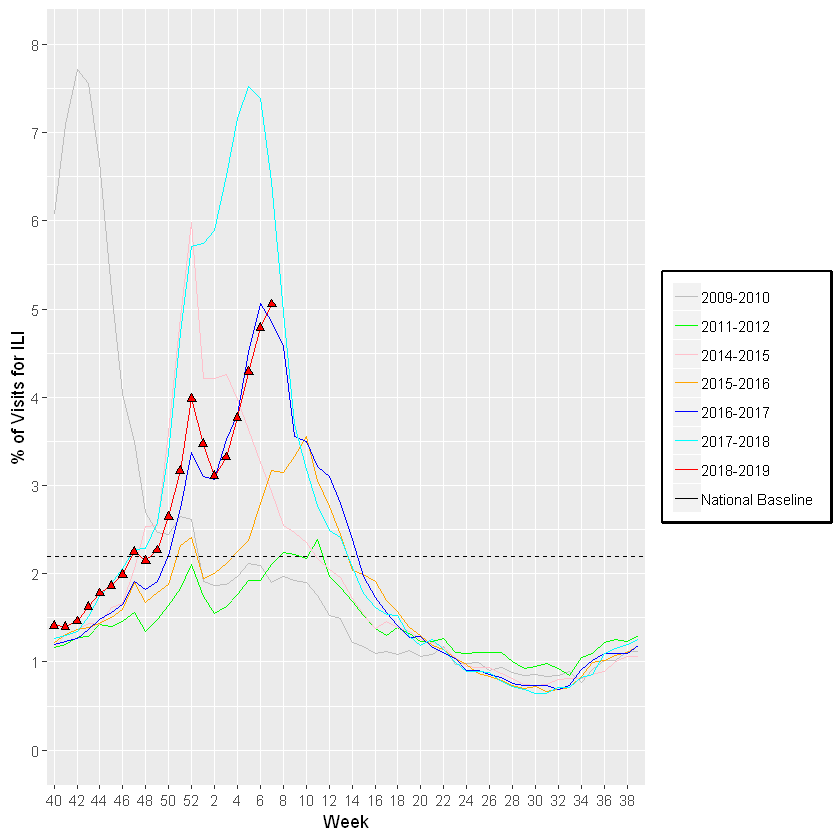

In [6]:

library(ggplot2)
library(reshape2)
#setwd("C:/UB_Spring_Semester/Data_Intensive_Computing/Lab_1/part2/part2/final/")
ili<-read.csv("./ILINet.csv")
ili_df<-data.frame(ili)

# Subsetting dataset based on seasons, 2009-2010, 2011-2012, 2014-2015, 2015-2016, 2016-2017
# 2017-2018, 2018-2019

ili_20092010 <- subset(ili_df, ((YEAR == 2009 & WEEK > 39) | (YEAR == 2010 & WEEK < 40)))
#ili_20092010

ili_20112012 <- subset(ili_df, ((YEAR == 2011 & WEEK > 39) | (YEAR == 2012 & WEEK < 40)))
#ili_20112012

ili_20142015 <- subset(ili_df, ((YEAR == 2014 & WEEK > 39) | (YEAR == 2015 & WEEK < 40)))
#ili_20142015

ili_20152016 <- subset(ili_df, ((YEAR == 2015 & WEEK > 39) | (YEAR == 2016 & WEEK < 40)))
#ili_20152016

ili_20162017 <- subset(ili_df, ((YEAR == 2016 & WEEK > 39) | (YEAR == 2017 & WEEK < 40)))
#ili_20162017

ili_20172018 <- subset(ili_df, ((YEAR == 2017 & WEEK > 39) | (YEAR == 2018 & WEEK < 40)))
#ili_20172018

ili_20182019 <- subset(ili_df, ((YEAR == 2018 & WEEK > 39) | (YEAR == 2019)))
#ili_20182019

# Creating a common column using factor for week using week column from one of the datasets
# for X-axis
f_week <- factor(ili_20152016$WEEK , levels = unique(ili_20152016$WEEK))
#length(f_week)
#f_week

# Creating a column using factor for week using week column from 2018-2019 dataset,  
# due to less data of 2019

f_week_1819 <- factor(ili_20182019$WEEK , levels = unique(ili_20182019$WEEK))
#length(f_week_1819)

# plotting using ggplot and geomline
ggplot(data = ili_20092010, aes(x = f_week, y = X..WEIGHTED.ILI,  group = 1)) + 
geom_line(data = ili_20092010, aes(x = f_week, y=X..WEIGHTED.ILI, color= "2009-2010")) +   
geom_line(data = ili_20112012, aes(x = f_week, y=X..WEIGHTED.ILI, color= "2011-2012")) +
geom_line(data = ili_20142015, aes(x = f_week, y=X..WEIGHTED.ILI, color= "2014-2015")) +
geom_line(data = ili_20152016, aes(x = f_week, y=X..WEIGHTED.ILI, color= "2015-2016")) +
geom_line(data = ili_20162017, aes(x = f_week, y=X..WEIGHTED.ILI, color= "2016-2017")) +
geom_line(data = ili_20172018, aes(x = f_week, y=X..WEIGHTED.ILI, color= "2017-2018")) +
geom_line(data = ili_20182019, aes(x = f_week_1819, y=X..WEIGHTED.ILI, color= "2018-2019")) +
geom_hline(aes(yintercept = 2.2,color = "National Baseline"), linetype="dashed") +
scale_x_discrete(breaks=c("40", "42", "44", "46", "48", "50", "52", "52", "2", "4", "6", "8",
                          "10", "12", "14", "16", "18", "20", "22", "24", "26", "28", "30", 
                          "32","34", "36", "38")) +
scale_y_continuous(breaks=seq(0,8, by=1), limits=c(0,8)) +
xlab("Week") + 
ylab("% of Visits for ILI") +
theme(legend.title= element_blank(),
      legend.box.background = element_rect(colour="black", linetype="solid", size=1.5)) + 
scale_color_manual(values=c("grey", "green", "pink", "orange", "blue", "cyan", "red", 
                            "black")) + 
geom_point(data = ili_20182019, shape = 24, size =1.5, fill = "red",  aes(x= f_week_1819)) 


# CHART 5:- Flu heat map of USA 
## This chart represents ILI activity levels for week 4 of 2019, across various states, in the form of a heatmap
## The activity level goes from 1- red to 10 - green 
## From the heatmap, we observe that, highest activity level is indicated for the state of Texas and it's surrounding states

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lenovo\AppData\Local\Temp\Rtmp0MCCri\downloaded_packages


Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'maptools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lenovo\AppData\Local\Temp\Rtmp0MCCri\downloaded_packages


Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'mapproj' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mapproj'"


The downloaded binary packages are in
	C:\Users\Lenovo\AppData\Local\Temp\Rtmp0MCCri\downloaded_packages


from URL https://api.github.com/repos/wmurphyrd/fiftystater/zipball/master
Installing fiftystater
"C:/Users/Lenovo/Anaconda3/lib/R/bin/x64/R" --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  "C:/Users/Lenovo/AppData/Local/Temp/Rtmp0MCCri/devtools2c485a6d54f0/wmurphyrd-fiftystater-28e7fa5"  \
  --library="C:/Users/Lenovo/Documents/R/win-library/3.5" --install-tests 

Reloading installed fiftystater


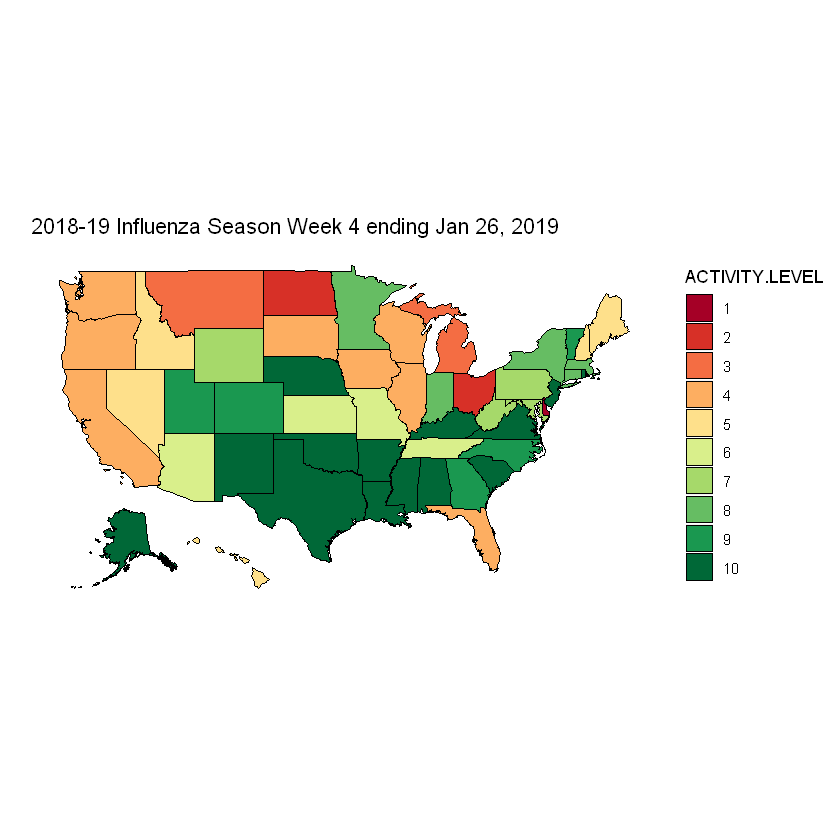

In [55]:
#install.packages("ggmap")
install.packages("devtools")
install.packages("maptools")
install.packages("mapproj")
devtools::install_github("wmurphyrd/fiftystater",force=TRUE)
library(ggplot2)
library(maps)
library(ggmap)
library(fiftystater)
#setwd("C:/UB_Spring_Semester/Data_Intensive_Computing/Lab_1/part2/part2/final/")

#load us map data
hm1<-read.csv("./StateDataforMap_2018-19week4.csv")
hm<-data.frame(hm1)
hm$STATENAME<-tolower(hm$STATENAME)
hm$ACTIVITY.LEVEL<-as.factor(as.numeric(gsub("Level ","" ,hm$ACTIVITY.LEVEL)))

# map_id creates the aesthetic mapping to the state name column in your data
p <- ggplot(hm, aes(map_id = STATENAME)) + 
  # map points to the fifty_states shape dataa
  geom_map(aes(fill = ACTIVITY.LEVEL),map = fifty_states,color="black") + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  ggtitle("2018-19 Influenza Season Week 4 ending Jan 26, 2019")+
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  scale_fill_brewer(palette="RdYlGn")+
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())
p

# 5th point:- CHART 1 2018 DATA
## Influenza National Summary (green and yellow chart)
## This chart by Clinical Lab represents the number of positive specimens by type - Influenza A Influenza B for 52 weeks of 2018
## Type of Influenza is shown as a stacked bar graph, while % positive flu is shown as a line graph
## From the graph, we observe that Number of positive specimens for Type A is highest in weeks 4, 5 and 6 of 2019
## From the graph, we observe that Number of positive specimens for Type B is highest in week 7 of 2019


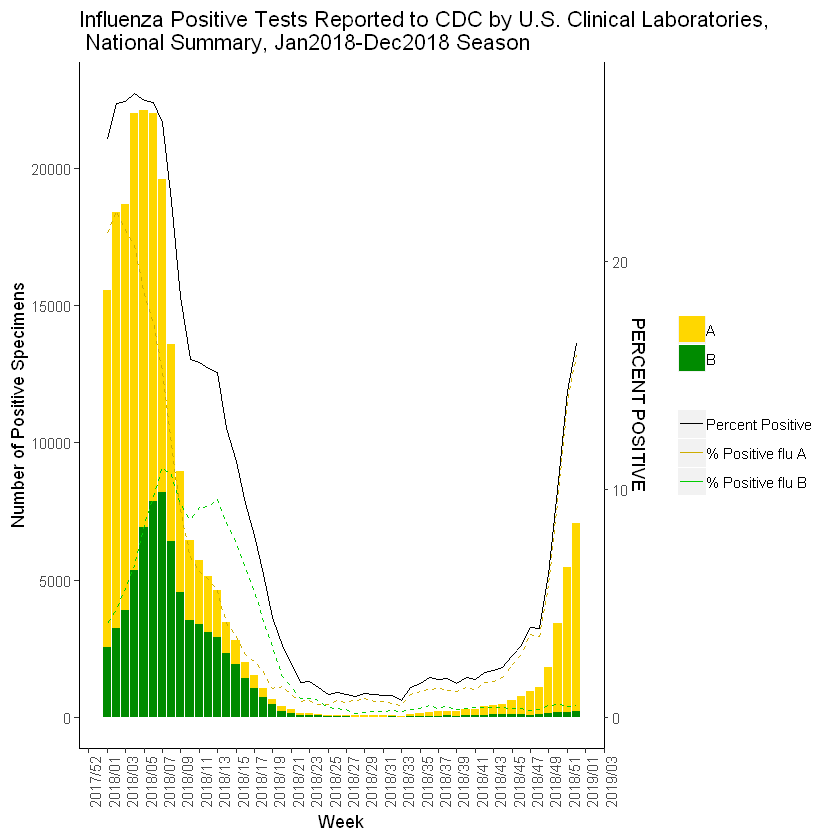

In [6]:
library(ggplot2)
library(reshape2)
#setwd("C:/UB_Spring_Semester/Data_Intensive_Computing/Lab_1/part2/part2/final/")
mydata <- read.csv("./WHO_NREVSS_Clinical_Labs_5th.csv")
newdata<-data.frame(mydata)
subData<-subset(newdata, YEAR!="2019")

influ<-subset(subData, YEAR!="2017")

POSITIVE <- (influ$PERCENT.POSITIVE/100)*influ$TOTAL.SPECIMENS
YEAR_WEEK <- paste(influ$YEAR,influ$WEEK, sep="-")
YEAR.WEEK<-as.Date(paste(YEAR_WEEK,1), format="%Y-%U%u")

influ_df <- data.frame(influ,POSITIVE,YEAR.WEEK)



influ_df_melt <- melt(influ_df, id.vars=c("REGION.TYPE","REGION","YEAR","WEEK","TOTAL.SPECIMENS","PERCENT.A",
                                        "PERCENT.B","PERCENT.POSITIVE","POSITIVE", "YEAR.WEEK"),
                      variable.name = "TOTAL.VARIABLE", value.name = "TOTAL.VALUE")
# Following function helps in formatting the date shown in X axis.
# it has been referred from the site:- 
#https://stackoverflow.com/questions/33348329/date-breaks-scales-shifts-date-scale-in-ggplot
date_label <- function (format = "%Y-%U") {
                        function(x) format(x, format)
                }

ggplot(data=influ_df_melt) + 

geom_bar(aes(x=YEAR.WEEK, y=TOTAL.VALUE, fill= TOTAL.VARIABLE), stat="identity") +
theme(axis.text.x= element_text(angle=90), legend.title=element_blank()) +
ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, \n National Summary, Jan2018-Dec2018 Season") +
ylab("Number of Positive Specimens") + 
xlab("Week") +
scale_fill_manual(values=c("gold1","green4"), breaks=c("TOTAL.A","TOTAL.B"), 
                  labels=c("A","B")) +
geom_line(aes(x= YEAR.WEEK,y=PERCENT.POSITIVE*830, group=1, colour="black"), stat="identity", linetype= "solid") +
geom_line(aes(x= YEAR.WEEK,y=PERCENT.A*830, group=1, colour="gold3"), stat="identity", linetype= "dashed") +
geom_line(aes(x= YEAR.WEEK,y=PERCENT.B*830, group=1, colour="green3"), stat="identity", linetype= "dashed") +
scale_y_continuous(sec.axis= sec_axis(~./830, name="PERCENT POSITIVE")) +
scale_linetype_manual(values=c("solid", "dashed","dashed")) +
scale_color_manual(values=c("black","gold3","green3"),
                     labels=c("Percent Positive","% Positive flu A","% Positive flu B")) +
scale_x_date(breaks = "2 weeks",labels=date_label("%Y/%U"))+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black"))

# 5th Point:- CHART 2 2018 DATA
# Positive Tested
## This chart by Public Health represents the number of positive specimens by type/ sub-types - Influenza A Influenza B for 52 weeks of 2018
## All types/ sub-types of Influenza is shown as a stacked bar graph
## Looking at the graph, we observe that Number of positive specimens in the weeks 20 - 40 of 2018 are minimum


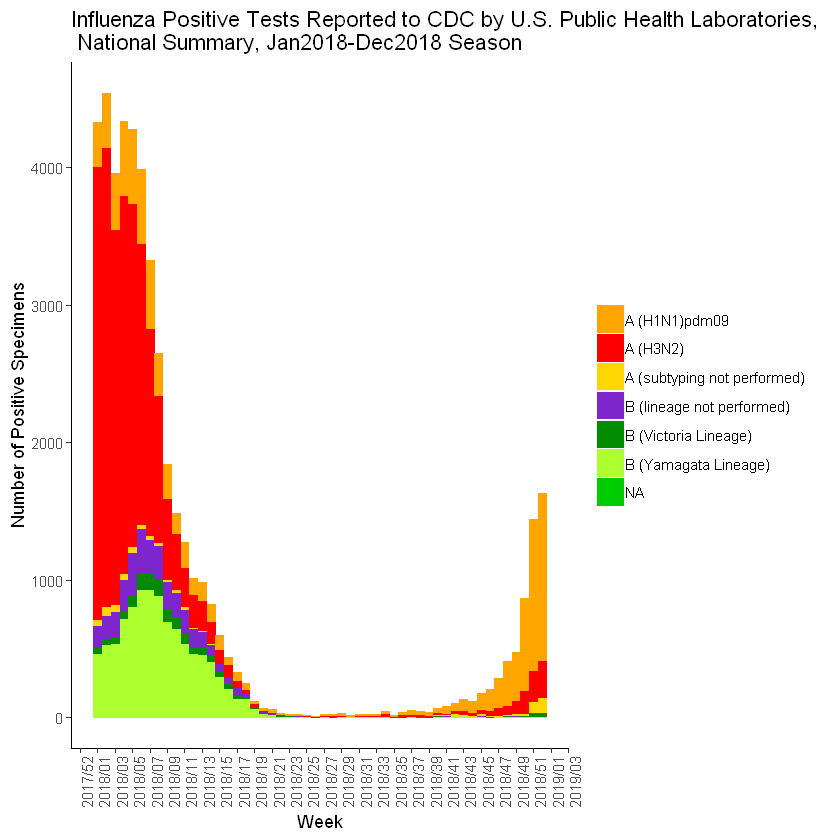

In [7]:
library(ggplot2)
library(reshape2)
#setwd("C:/UB_Spring_Semester/Data_Intensive_Computing/Lab_1/part2/part2/final/")

mydata <- read.csv("./WHO_NREVSS_Public_Health_Labs_5th.csv")
newdata<-data.frame(mydata)
subData<-subset(newdata, YEAR!="2019")


flu_df<-subset(subData, YEAR!="2017")


Year_week1 <- paste(flu_df$YEAR,flu_df$WEEK,sep="-")
Year_week<-as.Date(paste(Year_week1,1), format="%Y-%U%u")
influ_df <- data.frame(flu_df,Year_week)

# Following function helps in formatting the date shown in X axis.
# it has been referred from the site:- 
#https://stackoverflow.com/questions/33348329/date-breaks-scales-shifts-date-scale-in-ggplot
date_label <- function (format = "%Y-%U") {function(x) format(x, format)}
influ_melt <- melt(influ_df, id.vars=c("REGION.TYPE","REGION","YEAR","WEEK","TOTAL.SPECIMENS", "Year_week"), 
                   variable.name = "flu_type_variable", value.name="flu_type_value")
ggplot(data= influ_melt,aes(x=Year_week, y=flu_type_value)) + 
geom_bar(aes(fill=flu_type_variable,color=flu_type_variable), stat="identity") +
theme(axis.text.x= element_text(angle=90)) +
ggtitle("Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, \n National Summary, Jan2018-Dec2018 Season")+
scale_x_date(breaks = "2 weeks",labels=date_label("%Y/%U"))+
ylab("Number of Positive Specimens") + 
xlab("Week") +
theme(legend.title=element_blank())+
scale_fill_manual(values=c("orange","red","gold","purple3","green4","greenyellow","green3"),
                     labels=c("A (H1N1)pdm09","A (H3N2)","A (subtyping not performed)",
                              "B (lineage not performed)","B (Victoria Lineage)","B (Yamagata Lineage)"))+
scale_color_manual(values=c("orange","red","gold","purple3","green4","greenyellow","green3"),
                     labels=c("A (H1N1)pdm09","A (H3N2)","A (subtyping not performed)",
                              "B (lineage not performed)","B (Victoria Lineage)","B (Yamagata Lineage)"))+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black"))

# NEW YORK CHART:- CLINICAL DATA
## Influenza National Summary (green and yellow chart)
## This chart by Clinical Lab represents the number of positive specimens by type - Influenza A Influenza B for 52 weeks of 2018
## Type of Influenza is shown as a stacked bar graph, while % positive flu is shown as a line graph
## From the graph, we observe that Number of positive specimens for Type A and B is negligible for weeks 21- 45 2018


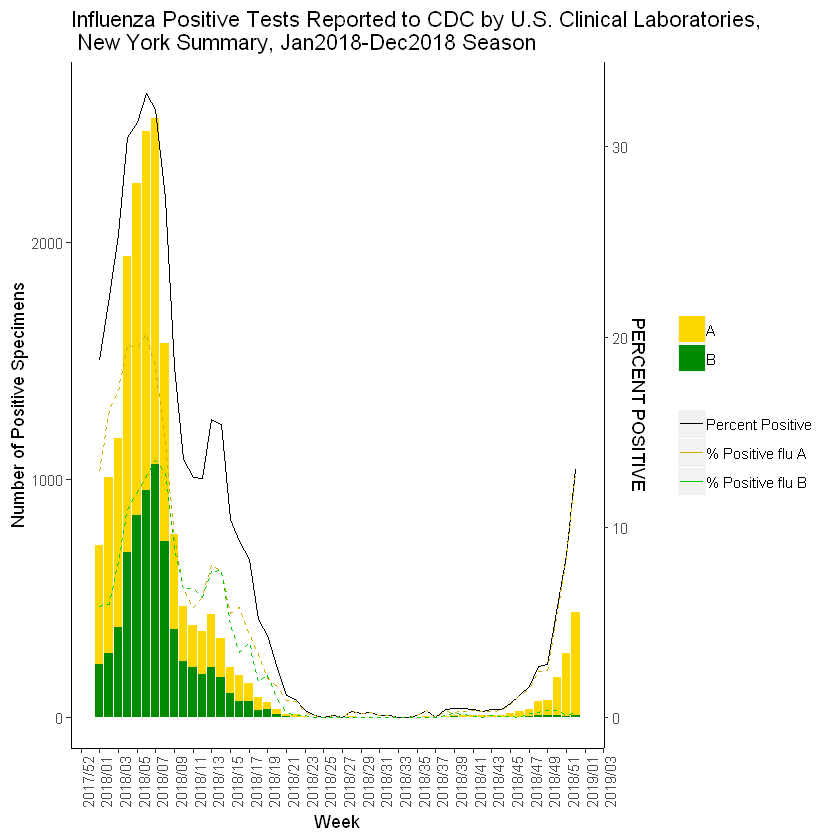

In [8]:
library(ggplot2)
library(reshape2)
#setwd("C:/UB_Spring_Semester/Data_Intensive_Computing/Lab_1/part2/part2/final/")
mydata <- read.csv("./WHO_NREVSS_Clinical_Labs_NY.csv")
newdata<-data.frame(mydata)
subData<-subset(newdata, YEAR!="2019")

def_df<-subset(subData, REGION == "New York")

influ<-subset(def_df, YEAR!="2017")


POSITIVE <- (influ$PERCENT.POSITIVE/100)*influ$TOTAL.SPECIMENS
YEAR_WEEK <- paste(influ$YEAR,influ$WEEK, sep="-")
YEAR.WEEK<-as.Date(paste(YEAR_WEEK,1), format="%Y-%U%u")

influ_df <- data.frame(influ,POSITIVE,YEAR.WEEK)



influ_df_melt <- melt(influ_df, id.vars=c("REGION.TYPE","REGION","YEAR","WEEK","TOTAL.SPECIMENS","PERCENT.A",
                                        "PERCENT.B","PERCENT.POSITIVE","POSITIVE", "YEAR.WEEK"),
                      variable.name = "TOTAL.VARIABLE", value.name = "TOTAL.VALUE")
# Following function helps in formatting the date shown in X axis.
# it has been referred from the site:- 
#https://stackoverflow.com/questions/33348329/date-breaks-scales-shifts-date-scale-in-ggplot
date_label <- function (format = "%Y-%U") {
                        function(x) format(x, format)
                }

ggplot(data=influ_df_melt) + 
geom_bar(aes(x=YEAR.WEEK, y=TOTAL.VALUE, fill= TOTAL.VARIABLE), stat="identity") +
theme(axis.text.x= element_text(angle=90), legend.title=element_blank()) +
ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, \n New York Summary, Jan2018-Dec2018 Season") +
ylab("Number of Positive Specimens") + 
xlab("Week") +
scale_fill_manual(values=c("gold1","green4"), breaks=c("TOTAL.A","TOTAL.B"), 
                  labels=c("A","B")) +
geom_line(aes(x= YEAR.WEEK,y=PERCENT.POSITIVE*80, group=1, colour="black"), stat="identity", linetype= "solid") +
geom_line(aes(x= YEAR.WEEK,y=PERCENT.A*80, group=1, colour="gold3"), stat="identity", linetype= "dashed") +
geom_line(aes(x= YEAR.WEEK,y=PERCENT.B*80, group=1, colour="green3"), stat="identity", linetype= "dashed") +
scale_y_continuous(sec.axis= sec_axis(~./80, name="PERCENT POSITIVE")) +
scale_linetype_manual(values=c("solid", "dashed","dashed")) +
scale_color_manual(values=c("black","gold3","green3"),
                     labels=c("Percent Positive","% Positive flu A","% Positive flu B")) +
scale_x_date(breaks = "2 weeks",labels=date_label("%Y/%U"))+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black"))